In [20]:
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from matplotlib.colors import ListedColormap

In [2]:
dataset = load_digits()

X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X,y,random_state=0)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

svm = SVC(kernel='linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

svmrbf = SVC(kernel='rbf',C=0.015).fit(X_train_mc, y_train_mc)
svmrbf_predicted_mc = svmrbf.predict(X_test_mc)
confusion_rbf_mc = confusion_matrix(y_test_mc, svmrbf_predicted_mc)
df_rbf_cm = pd.DataFrame(confusion_rbf_mc)

df_rbf_cm

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,13,0,0,30,0,0,0,0,0
2,2,35,3,2,2,0,0,0,0,0
3,0,5,0,40,0,0,0,0,0,0
4,0,0,0,0,38,0,0,0,0,0
5,7,9,0,5,12,15,0,0,0,0
6,0,0,0,0,40,0,12,0,0,0
7,0,22,0,0,21,0,0,5,0,0
8,3,21,0,4,20,0,0,0,0,0
9,18,5,0,18,6,0,0,0,0,0


<IPython.core.display.Javascript object>


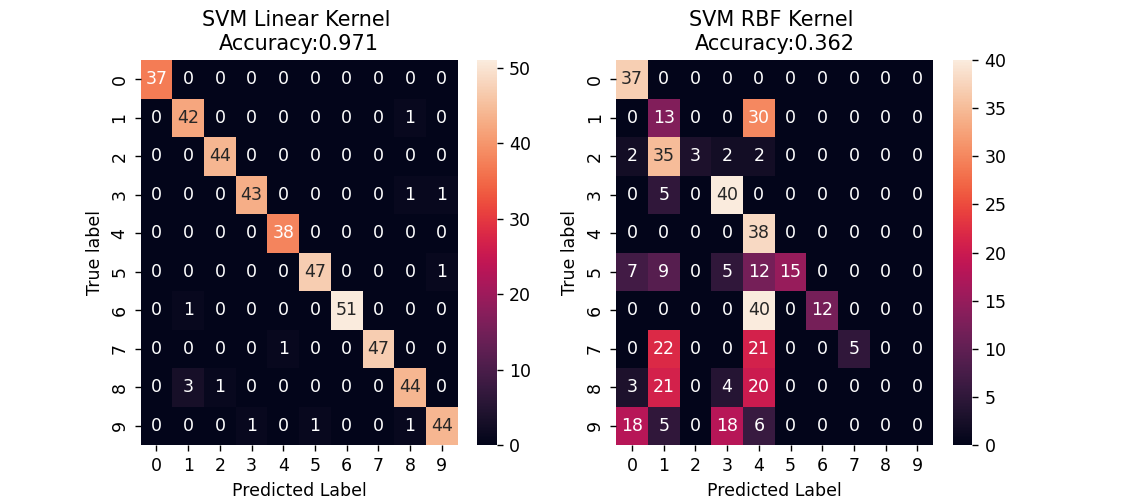

Text(0.5, 14.722222222222216, 'Predicted Label')

In [22]:
plt.figure(figsize=(9,4))
plt.subplot(121)
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc,svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted Label')

plt.subplot(122)
sns.heatmap(df_rbf_cm,annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc,svmrbf_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted Label')


In [24]:
from sklearn.metrics import classification_report

print('svm linear kernel:')
print(classification_report(y_test_mc, svm_predicted_mc))
print('svm rbf kernel:')
print(classification_report(y_test_mc, svmrbf_predicted_mc))

svm linear kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

svm rbf kernel:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        37
           1       0.12      0.30      0.17        43
           2       1.00      0.07      0.13

F:\Program Files\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Program Files\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Program Files\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
print('micro-averaged precision for linear = {:.2f}'.format(precision_score(y_test_mc,svm_predicted_mc,average='micro')))
print('macro-averaged precision for linear = {:.2f}'.format(precision_score(y_test_mc,svm_predicted_mc,average='macro')))
print('micro-averaged precision for RBF = {:.2f}'.format(precision_score(y_test_mc,svmrbf_predicted_mc,average='micro')))
print('macro-averaged precision for RBF = {:.2f}'.format(precision_score(y_test_mc,svmrbf_predicted_mc,average='macro')))

micro-averaged precision for linear = 0.97
macro-averaged precision for linear = 0.97
micro-averaged precision for RBF = 0.36
macro-averaged precision for RBF = 0.55


F:\Program Files\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear model, coefficients:  [-698.80206267]
Mean squared error (linear model): 4646.74
Mean squared error (dummy): 4965.13
r2 score (linear model): 0.06
r2 score (dummy): -0.00


<IPython.core.display.Javascript object>


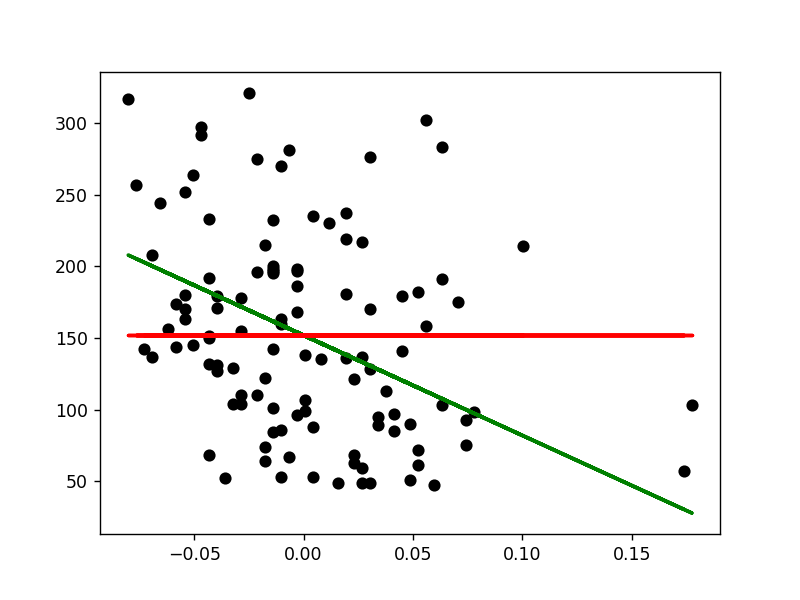

In [36]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:,None,6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train,y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print('Mean squared error (linear model): {:.2f}'.format(mean_squared_error(y_test,y_predict)))
print('Mean squared error (dummy): {:.2f}'.format(mean_squared_error(y_test,y_predict_dummy_mean)))
print('r2 score (linear model): {:.2f}'.format(r2_score(y_test,y_predict)))
print('r2 score (dummy): {:.2f}'.format(r2_score(y_test,y_predict_dummy_mean)))

plt.figure()
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_predict, color='green',linewidth=2)
plt.plot(X_test,y_predict_dummy_mean, color='red',linewidth=2)
plt.show()

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()

X, y = dataset.data, dataset.target == 1

clf = SVC(kernel='linear',C=1)

print('Cross validation (accuracy)',cross_val_score(clf,X,y,cv=5))
print('Cross validation (AUC)',cross_val_score(clf,X,y,cv=5,scoring = 'roc_auc'))
print('Cross validation (recall)',cross_val_score(clf,X,y,cv=5,scoring = 'recall'))


Cross validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma':[0.001,0.01,0.05,0.1,1,10,100]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train,y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)

In [6]:
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (max. accuracy): ', grid_clf_acc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (max. accuracy):  0.9985157648354676


In [8]:
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring='roc_auc')
grid_clf_auc.fit(X_train,y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)

In [9]:
print('test set auc: ', roc_auc_score(y_test, y_decision_fn_scores_auc))

print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (max. AUC): ', grid_clf_auc.best_score_)


test set auc:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (max. AUC):  1.0


In [14]:
from sklearn.metrics import SCORERS

sorted(list(SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [18]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = int(np.amax(y)) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # numpy.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

<IPython.core.display.Javascript object>


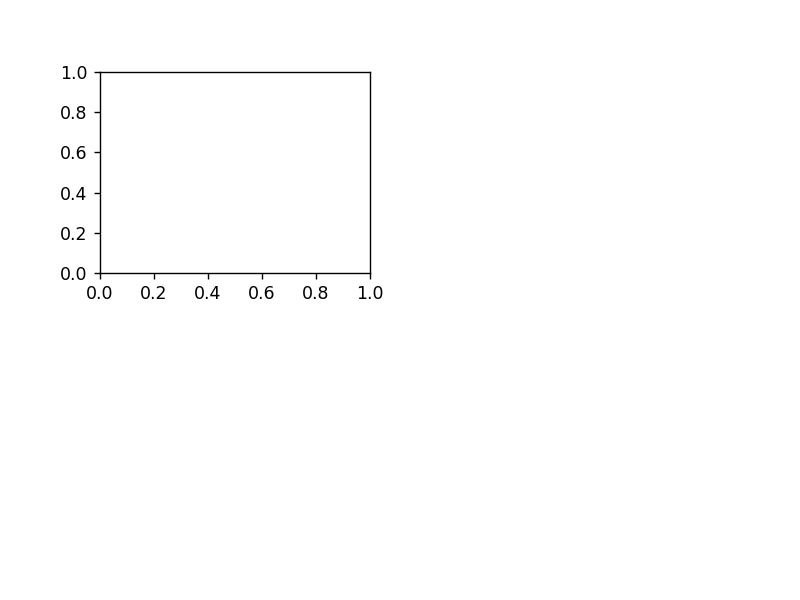

Grid best parameter (max. precision):{'class_weight': {1: 2}}
Grid best score (precision):0.5354524418463037


<IPython.core.display.Javascript object>


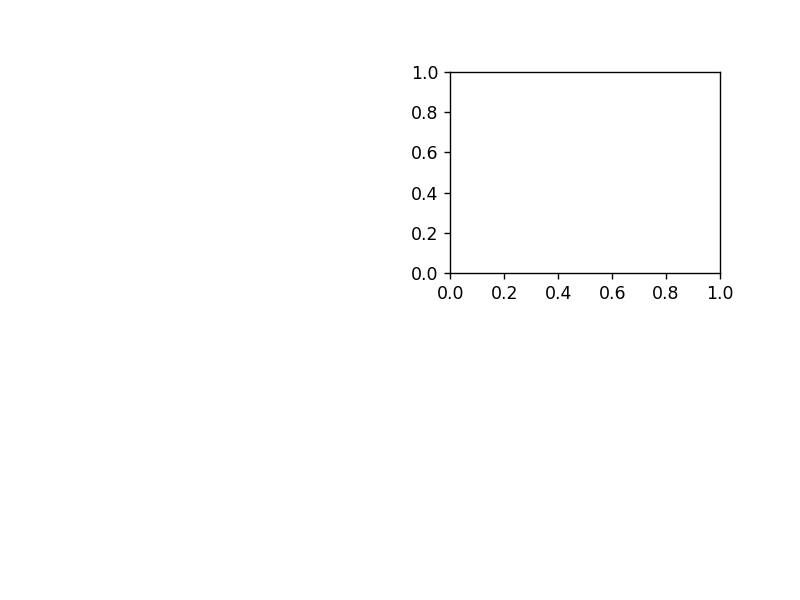

Grid best parameter (max. recall):{'class_weight': {1: 50}}
Grid best score (recall):0.9285714285714285


C:\Users\hry09\AppData\Local\Temp\ipykernel_18336\1725473856.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


<IPython.core.display.Javascript object>


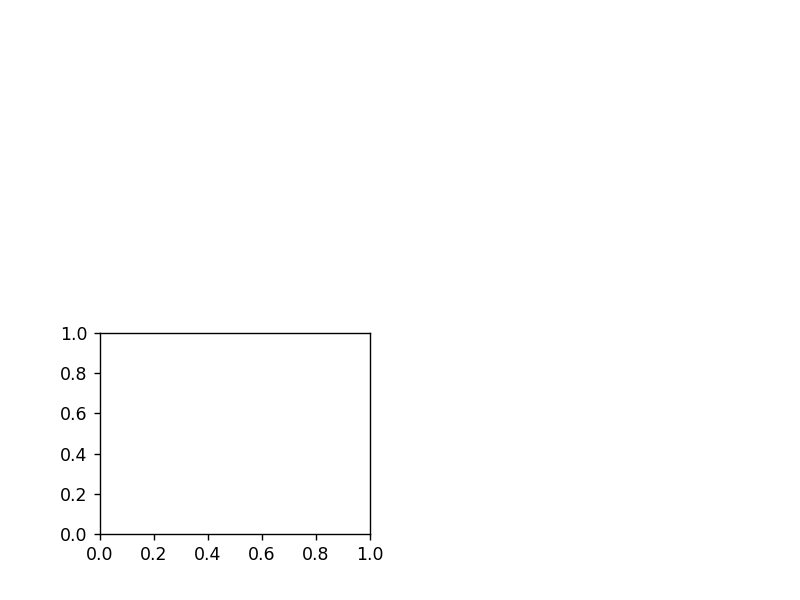

Grid best parameter (max. f1):{'class_weight': {1: 3}}
Grid best score (f1):0.5198835165079048


C:\Users\hry09\AppData\Local\Temp\ipykernel_18336\1725473856.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


<IPython.core.display.Javascript object>


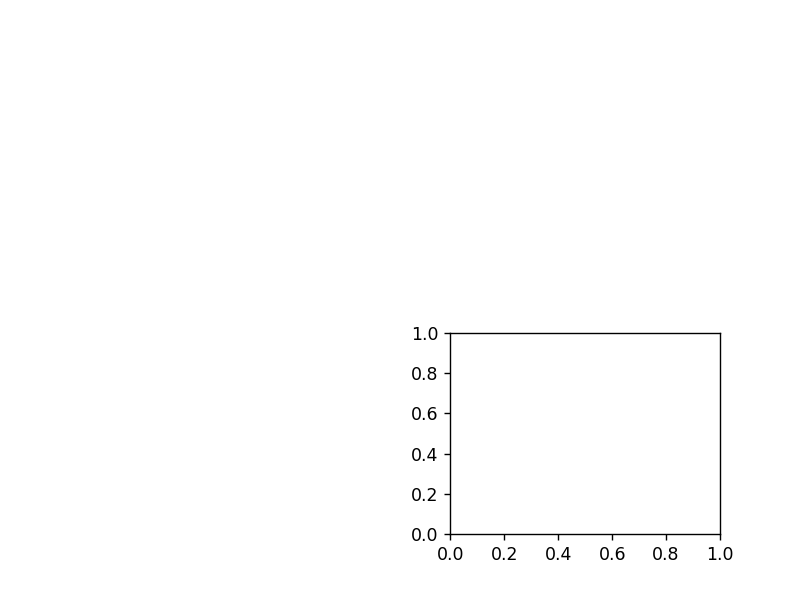

Grid best parameter (max. roc_auc):{'class_weight': {1: 4}}
Grid best score (roc_auc):0.89132635111511


C:\Users\hry09\AppData\Local\Temp\ipykernel_18336\1725473856.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


<IPython.core.display.Javascript object>


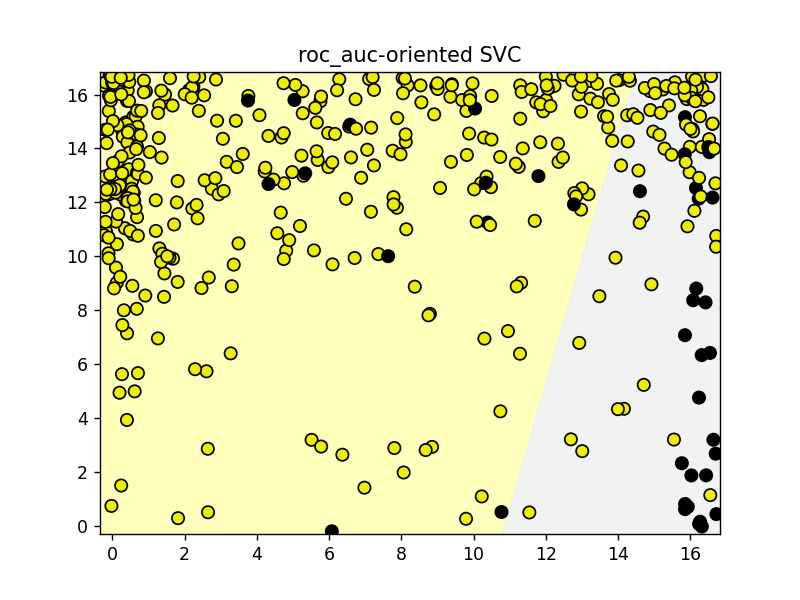

In [22]:
jitter_delta = 0.25

X_twovar_train = X_train[:,[20,59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test = X_test[:,[20,59]] + np.random.rand(X_test.shape[0],2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced',{1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}

plt.figure()

for i, eval_metric in enumerate(('precision','recall','f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid = grid_values, scoring = eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}):{1}'.format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}):{1}'.format(eval_metric, grid_clf_custom.best_score_))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    plot_class_regions_for_classifier(grid_clf_custom, X_twovar_test, y_test)
    plt.title(eval_metric + '-oriented SVC')

plt.show()

<IPython.core.display.Javascript object>


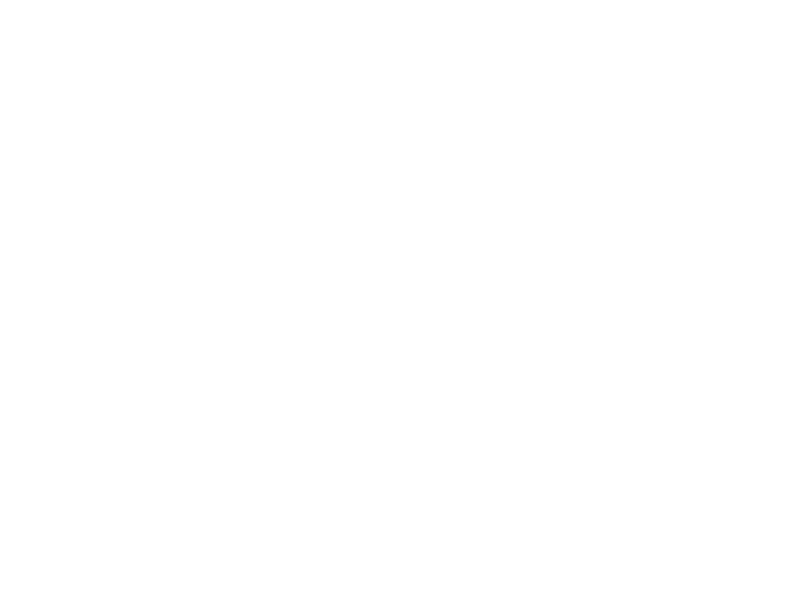

<IPython.core.display.Javascript object>


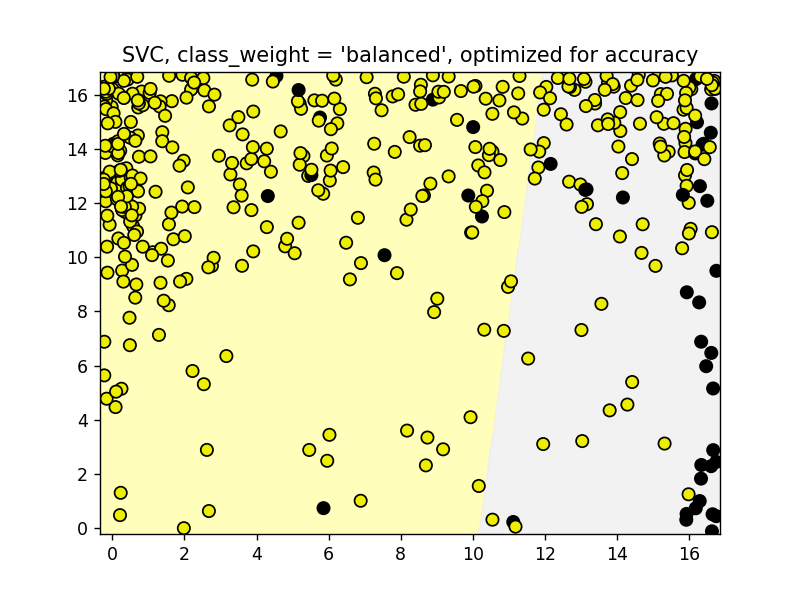

<IPython.core.display.Javascript object>


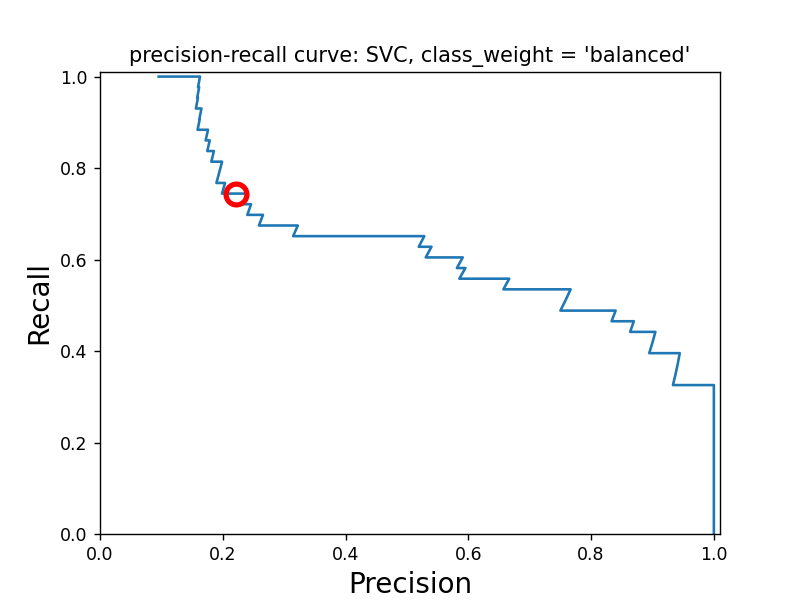

At zero threshold, precision = 0.22, recall = 0.74


In [27]:
from sklearn.metrics import precision_recall_curve

jitter_delta = 0.25

X_twovar_train = X_train[:,[20,59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test = X_test[:,[20,59]] + np.random.rand(X_test.shape[0],2) - jitter_delta

clf = SVC(kernel = 'linear',class_weight = 'balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")

plt.figure()
plt.title("precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o',markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision',fontsize=16)
plt.ylabel('Recall',fontsize=16)
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])

print('At zero threshold, precision = {:.2f}, recall = {:.2f}'.format(closest_zero_p, closest_zero_r))